# Washington Electric Car Analysis
by: @mufiiin

## A. Prepare Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/fadhiljr7/datascience003.git

Cloning into 'datascience003'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 6.34 MiB | 40.60 MiB/s, done.


In [ ]:
!unzip /content/datascience003/archive.zip

Archive:  /content/datascience003/archive.zip
  inflating: Electric_Vehicle_Population_Data.csv  


In [ ]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

## B. Exploratory Data Analysis

### 1. Data Information

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


In [ ]:
df.shape

(194232, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194232 entries, 0 to 194231
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         194232 non-null  object 
 1   County                                             194223 non-null  object 
 2   City                                               194223 non-null  object 
 3   State                                              194232 non-null  object 
 4   Postal Code                                        194223 non-null  float64
 5   Model Year                                         194232 non-null  int64  
 6   Make                                               194232 non-null  object 
 7   Model                                              194232 non-null  object 
 8   Electric Vehicle Type                              194232 non-null  object

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,9
City,9
State,0
Postal Code,9
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


### 2. Cleansing Data

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Model Year'] = df['Model Year'].astype(int)
df['Postal Code'] = df['Postal Code'].astype(int)

### 3. Visualization Based on Data Distribution

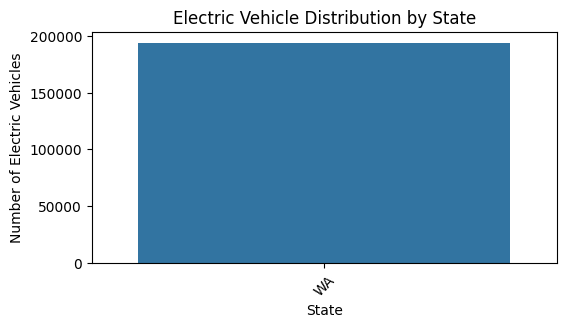

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index)
plt.title('Electric Vehicle Distribution by State')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Number of Electric Vehicles')
plt.show()

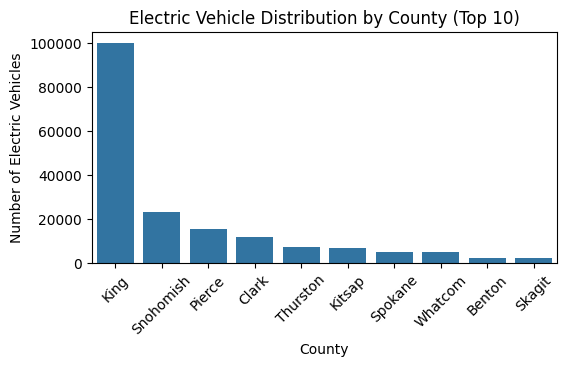

In [ ]:
plt.figure(figsize=(6, 3))
top_counties = df['County'].value_counts().nlargest(10)
sns.barplot(x=top_counties.index, y=top_counties.values)
plt.title('Electric Vehicle Distribution by County (Top 10)')
plt.xlabel('County')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.show()

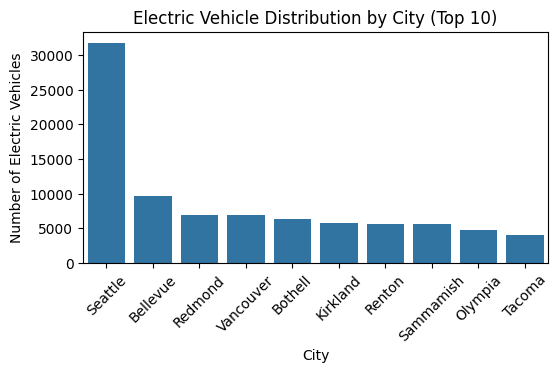

In [ ]:
plt.figure(figsize=(6, 3))
top_cities = df['City'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Electric Vehicle Distribution by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.show()

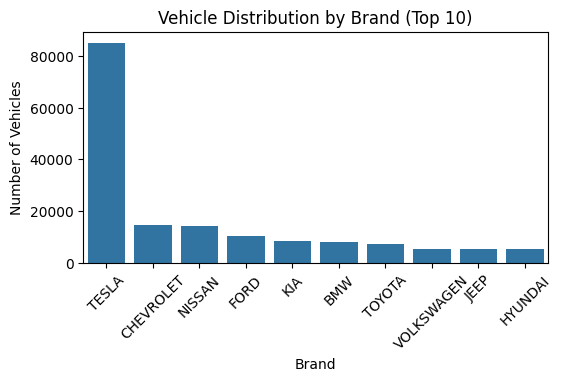

In [ ]:
plt.figure(figsize=(6, 3))
top_makes = df['Make'].value_counts().nlargest(10)
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title('Vehicle Distribution by Brand (Top 10)')
plt.xlabel('Brand')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

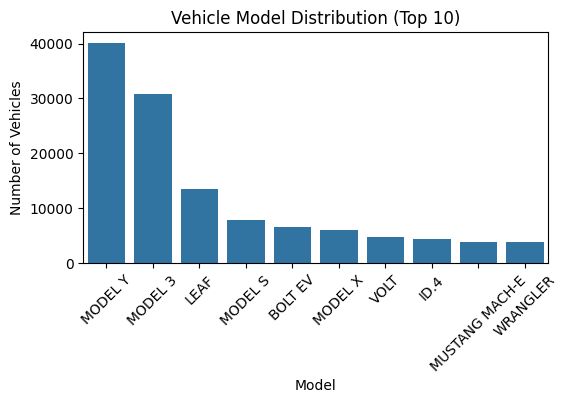

In [ ]:
plt.figure(figsize=(6, 3))
top_models = df['Model'].value_counts().nlargest(10)
sns.barplot(x=top_models.index, y=top_models.values)
plt.title('Vehicle Model Distribution (Top 10)')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

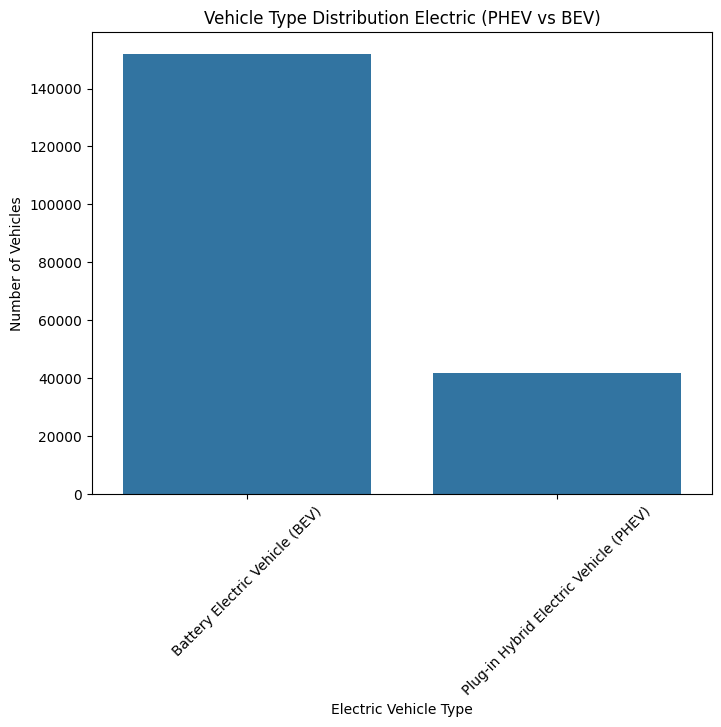

In [ ]:
plt.figure(figsize=(8, 6))
vehicle_type_counts = df['Electric Vehicle Type'].value_counts()
sns.barplot(x=vehicle_type_counts.index, y=vehicle_type_counts.values)
plt.title('Vehicle Type Distribution Electric (PHEV vs BEV)')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

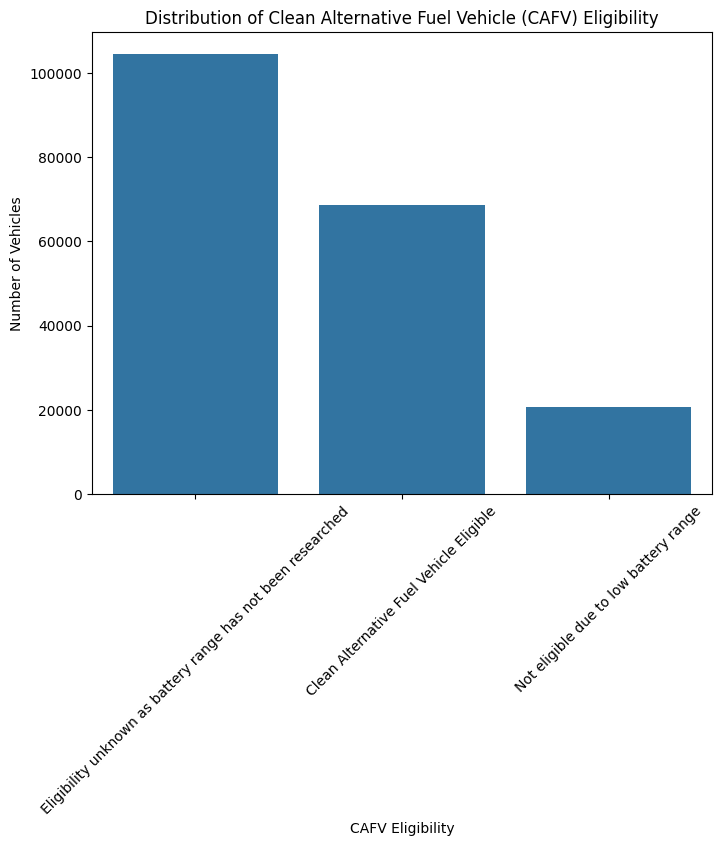

In [ ]:
plt.figure(figsize=(8, 6))
cafv_eligibility_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
sns.barplot(x=cafv_eligibility_counts.index, y=cafv_eligibility_counts.values)
plt.title('Distribution of Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

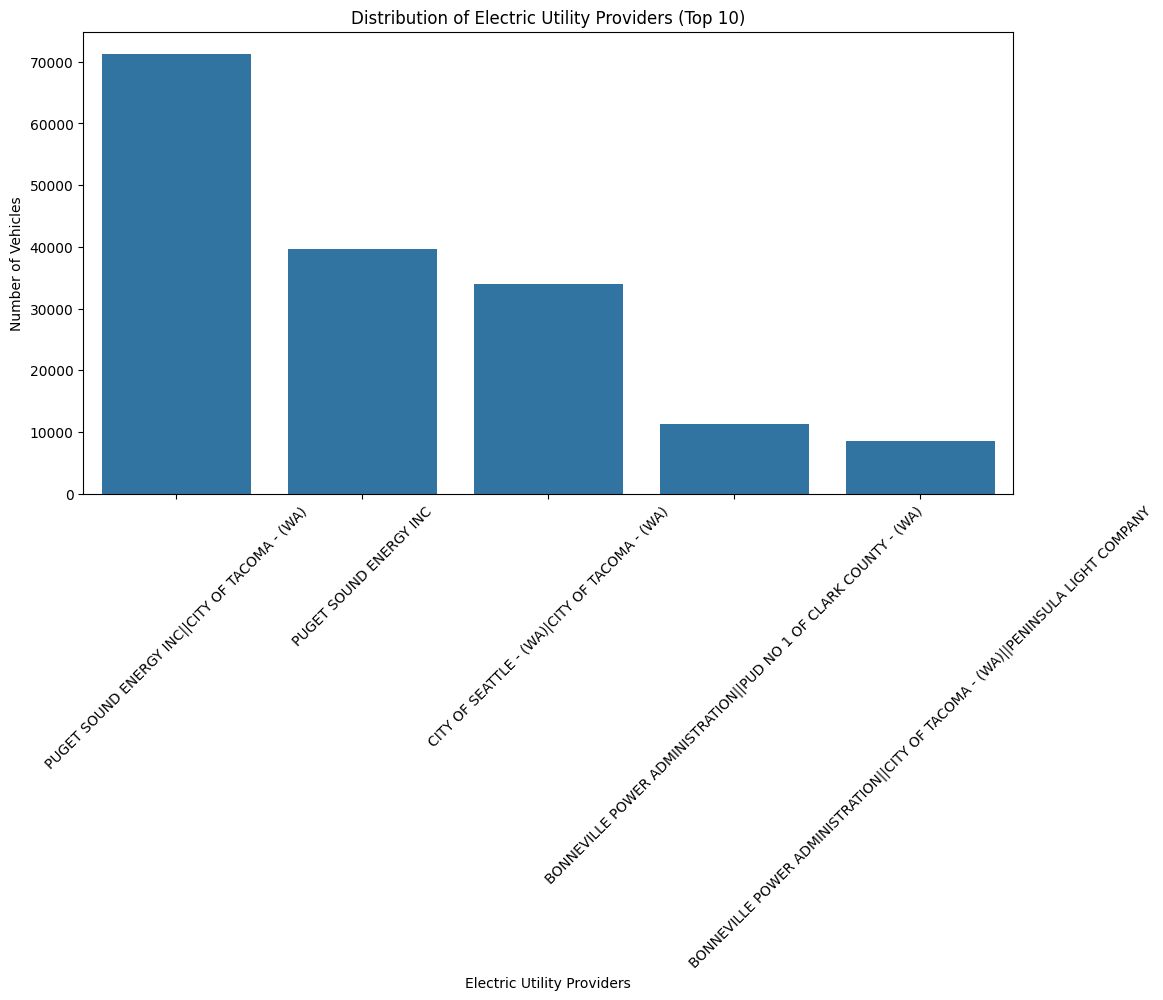

In [ ]:
plt.figure(figsize=(12, 6))
electric_utility_counts = df['Electric Utility'].value_counts().nlargest(5)
sns.barplot(x=electric_utility_counts.index, y=electric_utility_counts.values)
plt.title('Distribution of Electric Utility Providers (Top 10)')
plt.xlabel('Electric Utility Providers')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

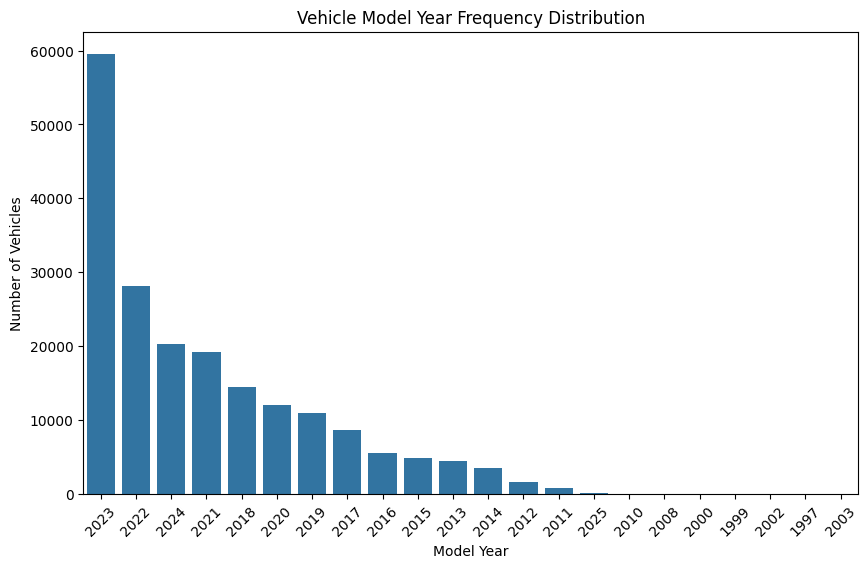

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Model Year', order=df['Model Year'].value_counts().index)
plt.title('Vehicle Model Year Frequency Distribution')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

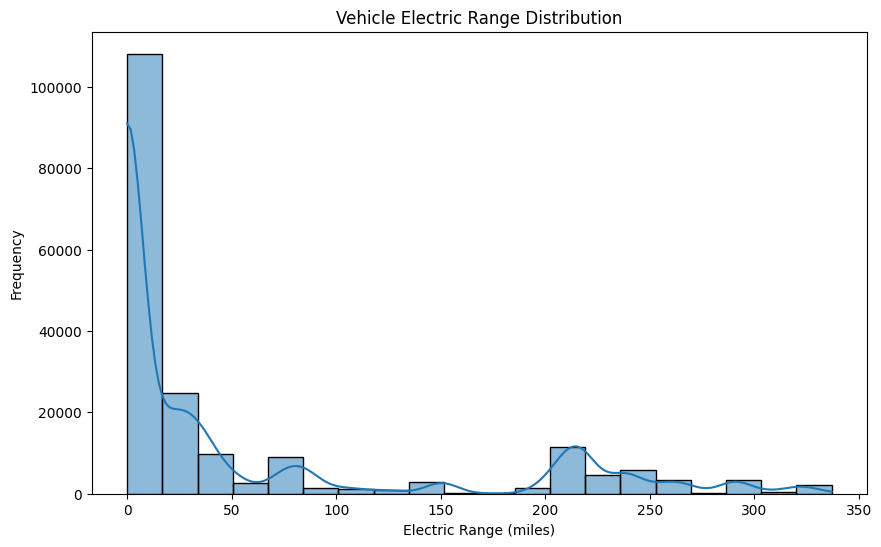

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=20, kde=True)
plt.title('Vehicle Electric Range Distribution')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

### 4. Statistics

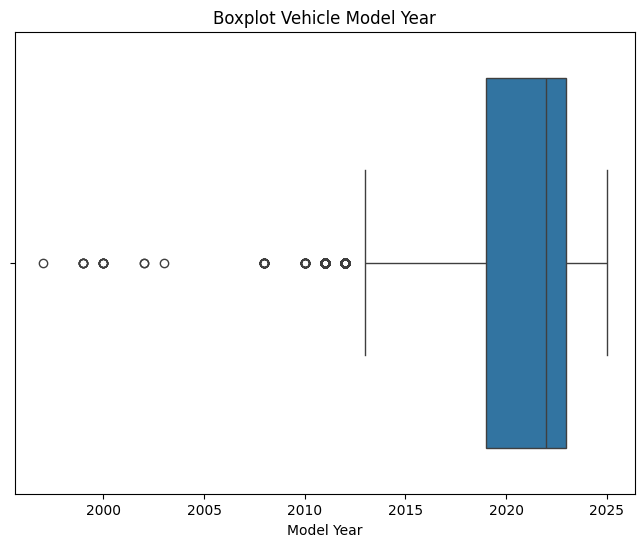

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Model Year')
plt.title('Boxplot Vehicle Model Year')
plt.xlabel('Model Year')
plt.show()

In [ ]:
mean_range = df['Electric Range'].mean()
max_range = df['Electric Range'].max()
std_range = df['Electric Range'].std()
print(f"Average Electric Range: {mean_range:.2f} miles")
print(f"Maximum Electric Range: {max_range:.2f} miles")
print(f"Standard Deviation Electric Range: {std_range:.2f} miles")

Average Electric Range: 54.81 miles
Maximum Electric Range: 337.00 miles
Standard Deviation Electric Range: 89.59 miles


In [ ]:
Q1 = df['Electric Range'].quantile(0.25)
Q3 = df['Electric Range'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Electric Range'] < lower_bound) | (df['Electric Range'] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")
print(f"Lower limit: {lower_bound:.2f} miles")
print(f"Upper limit: {upper_bound:.2f} miles")

Number of outliers: 32762
Lower limit: -102.00 miles
Upper limit: 170.00 miles


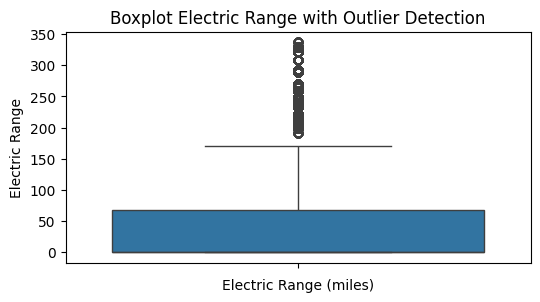

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(df['Electric Range'])
plt.title('Boxplot Electric Range with Outlier Detection')
plt.xlabel('Electric Range (miles)')
plt.show()

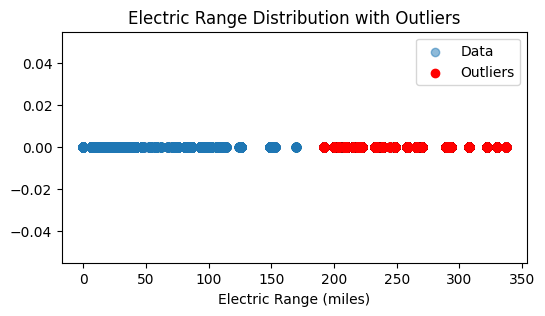

In [ ]:
plt.figure(figsize=(6, 3))
plt.scatter(df['Electric Range'], np.zeros_like(df['Electric Range']), alpha=0.5, label='Data')
plt.scatter(outliers['Electric Range'], np.zeros_like(outliers['Electric Range']), color='red', label='Outliers')
plt.title('Electric Range Distribution with Outliers')
plt.xlabel('Electric Range (miles)')
plt.legend()
plt.show()

In [ ]:
Q1 = df['Model Year'].quantile(0.25)
Q3 = df['Model Year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Model Year'] < lower_bound) | (df['Model Year'] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")
print(f"Lower bound: {lower_bound:.0f}")
print(f"Upper bound: {upper_bound:.0f}")

Number of outliers: 2381
Lower bound: 2013
Upper bound: 2029


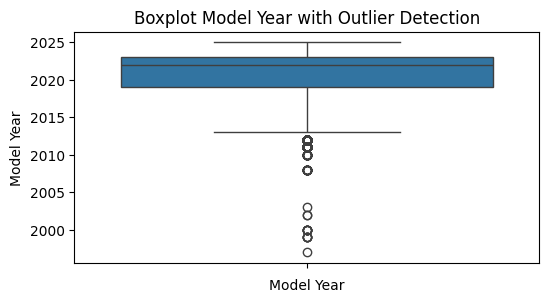

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(df['Model Year'])
plt.title('Boxplot Model Year with Outlier Detection')
plt.xlabel('Model Year')
plt.show()

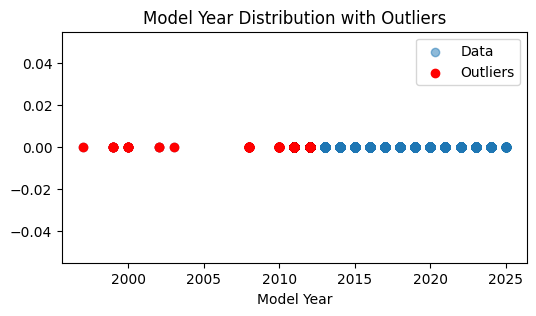

In [ ]:
plt.figure(figsize=(6, 3))
plt.scatter(df['Model Year'], np.zeros_like(df['Model Year']), alpha=0.5, label='Data')
plt.scatter(outliers['Model Year'], np.zeros_like(outliers['Model Year']), color='red', label='Outliers')
plt.title('Model Year Distribution with Outliers')
plt.xlabel('Model Year')
plt.legend()
plt.show()

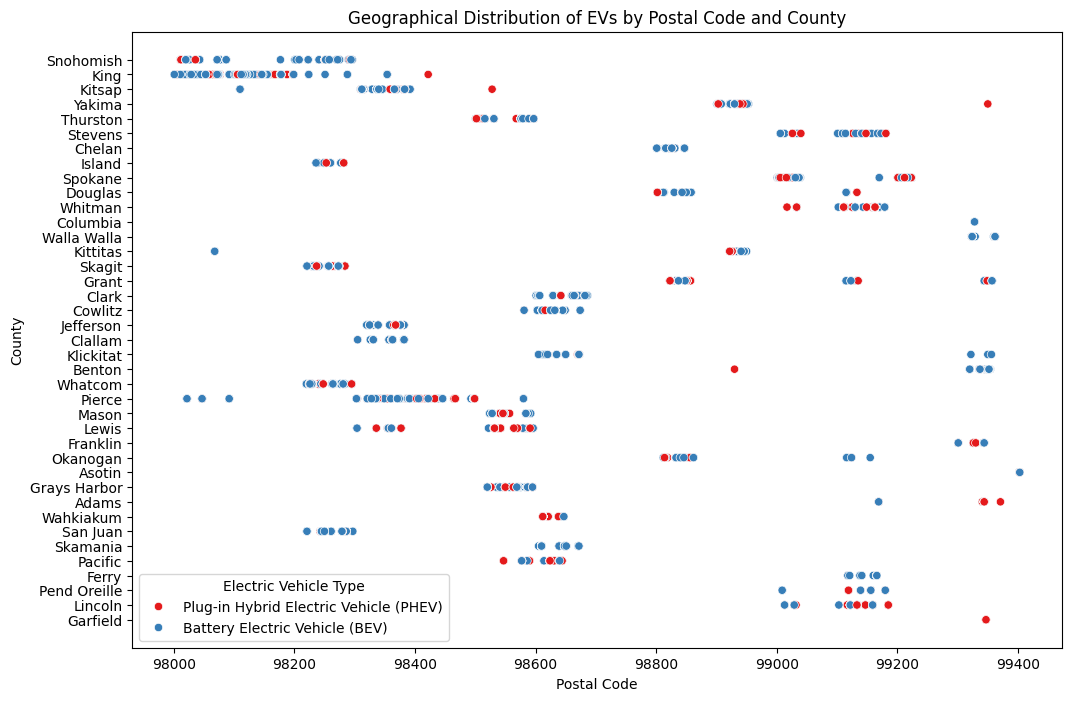

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Postal Code', y='County', hue='Electric Vehicle Type', data=df, palette='Set1')
plt.title('Geographical Distribution of EVs by Postal Code and County')
plt.xlabel('Postal Code')
plt.ylabel('County')
plt.show()